# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [58]:
x = np.array([6, 2, 0, 3, 0, 0, 5,7, 0])
def max_element(x):
    if x.all() != 0 or x[-1:] == 0:
        return ('None')
    else:
        zero = x == 0
        a = x[1:][zero[:-1]]
        b = a.max()
        return b
y = np.random.randint(9, size=10)
print ('Случайный вектор:', y, 'Максимальный элемент:', max_element(y), sep='\n')

Случайный вектор:
[7 6 0 3 4 5 2 7 5 2]
Максимальный элемент:
3


**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [59]:
def nearest_value(X, v):
    Y = np.abs(X - v*np.ones(X.shape))
    m = np.min(Y)
    inds = np.where(Y == m)
    return X[inds[0][0], inds[1][0]]

X = np.arange(0,10).reshape((2, 5))
v = 3.6
print ('Матрица:', X, 'Число:', v, 'Ближайший к числу элемент матрицы:', nearest_value(X, v), sep='\n')

Матрица:
[[0 1 2 3 4]
 [5 6 7 8 9]]
Число:
3.6
Ближайший к числу элемент матрицы:
4


**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [60]:
def scale(X):
    X_m = X - np.reshape(X.shape[0]*list(np.mean(X, axis=0)), newshape=X.shape)
    adj = list(map(lambda x: 1 if x == 0 else 0, np.mean(X, axis=0)))
    std = np.reshape(X.shape[0]*list(np.std(X, axis=0) + adj), newshape=X.shape)
    ans = X_m / std
    return X_m / ans
X = np.random.randint(-7, 8, size=(2,5))
ans3 = scale(X)
print ('Матрица:', X, 'Масштабированная матрица:', ans3, sep='\n')

Матрица:
[[-5 -5 -5 -3 -6]
 [-1  6  3 -2  7]]
Масштабированная матрица:
[[ 2.   5.5  4.   0.5  6.5]
 [ 2.   5.5  4.   0.5  6.5]]


**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [61]:
def get_stats(X):
    detr = np.linalg.det(X)
    trce = np.trace(X)
    mini = np.min(X)
    maxi = np.max(X)
    frob = np.linalg.norm(X)
    sobst = np.linalg.eigvals(X)
    obr = np.linalg.inv(X)
    return detr, trce, mini, maxi, frob, sobst, obr

X = np.random.normal(size=(5,5))
get_stats(X)

(0.92951712098448502,
 -1.4644102781104857,
 -1.7014618033480022,
 0.60693736993118075,
 3.694594203119566,
 array([-2.12689934+0.j        ,  0.36051471+1.49026207j,
         0.36051471-1.49026207j, -0.46142666+0.j        ,  0.40288630+0.j        ]),
 array([[-0.28843424, -0.88551913,  0.1140411 ,  0.50836794,  1.34325453],
        [-0.42611637,  0.70410377,  0.66319274, -0.73764048, -1.74496764],
        [ 0.75837827,  2.38488212, -0.14211043, -2.98766409, -3.70246156],
        [ 0.33056268,  0.48932152,  0.00664673, -1.01731683, -1.75646691],
        [-0.30499154, -0.46045829, -0.87312707,  0.86311136,  0.89519781]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [62]:
matrix = []
for exp_num in range(100):
    X, Y = np.random.normal(size=(10,10)), np.random.normal(size=(10,10))
    matrix += [np.max(X.dot(Y))]
matrix = np.array(matrix)
matr_max = max(matrix)
matr_mean = np.mean(matrix)
matr_perc = np.percentile(matrix, 95)
print ('Матрица:', matrix, 'Максимальный элемент:', matr_max, 'Среднее по экспериментам:', matr_mean, '95-процентная квантиль:', matr_perc, sep='\n')

Матрица:
[ 10.12647156   9.38694293   7.48853985   8.36999652   7.13064921
   8.70499047   6.60429597   5.86376162   8.01940312   8.88749595
   7.74046632   5.12450195   7.53212231   9.00821999   9.54250983
  12.57063123   7.19407598   6.94620557  10.6302588    6.92157527
   8.09060484   9.7219517    8.74136318   8.21503124   8.3018729
  10.52650766   9.08168855   9.88344459   9.29556692   8.54989604
   7.53847563   8.01580948   7.67523704   7.44568329   8.12610956
  13.38403602   7.15978      8.11337081  10.07329133   8.21814971
   7.81421902   7.17872572   9.57657861   7.98939587   7.17853833
  10.42344411   8.45910177   5.82834195   7.27689365  10.16273796
   8.82131223  11.04840652  11.93637682   7.07975908   8.75914009
  10.96879992   7.29069175   8.82977423   6.67469601  10.98088955
   5.62597698  19.33263807  10.02065266   8.75542714   7.27471733
   8.60806709   8.39840745  10.29997309   6.27957891  10.68970272
   8.14044178   9.91287167   6.68416474   9.95845541   7.35692489
  

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [63]:
import pandas as pd

data = pd.read_csv('2008.csv')
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


##### Посчитаем количество пропущенных элементов по признакам:

In [64]:
X = np.array(data.shape[0] - data.count())
len(X.nonzero()[0])

16

##### Посчитаем количество пропущенных элементов по объектам:

In [65]:
X = np.array(data.shape[1] - data.count(axis=1))
len(X.nonzero()[0])

70000

In [66]:
len(data)

70000

Получаем, что пропущенные элементы есть везде.

###### Посчитаем общее количество пропущенных элементов:

In [67]:
data.isnull().sum().sum()

355215

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

###### Посчитаем пропущенные элементы в целевой переменной:

In [68]:
(data.shape[0] - data.count())['DepDelay']

1399

In [69]:
data[data['DepDelay'].isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Полеты с пропущенной целевой переменной отменены: Cancelled = 1, этот признак можно выбросить 

In [70]:
prep_data = data[data['DepDelay'].notnull()]
prep_data = prep_data[prep_data['DepDelay'] != 0]
y = prep_data['DepDelay']
prep_data = prep_data.drop(['Cancelled', 'DepDelay'], axis = 1)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [71]:
features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for f in features:
    prep_data[f + '_Hour'] = prep_data[f] / 100
    prep_data[f + '_Minute'] = prep_data[f] % 100
prep_data = prep_data.drop(features, axis=1)

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Признаки CarrierDelay,   WeatherDelay ... Целевая переменная должна быть их суммой. Уберем их.

In [72]:
prep_data = prep_data.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TailNum', 'Year'], axis=1)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

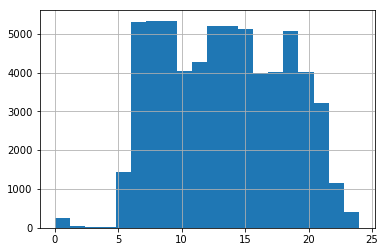

In [73]:
prep_data['DepTime_Hour'].hist(bins=20)

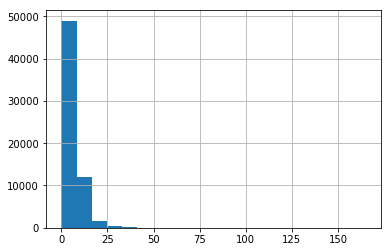

In [74]:
prep_data['TaxiIn'].hist(bins=20)

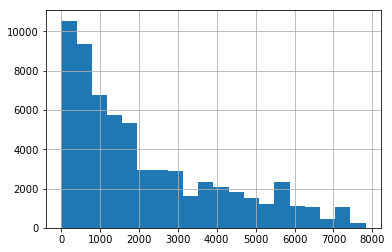

In [75]:
prep_data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Ответ: Область значений признака сильно варьируется: от 30 до 8000, это может привести к слишком большим коэффициентам в линейных моделях.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [77]:
prep_data.shape

(63404, 24)

In [78]:
def transform_data(data):
    new_data = pd.get_dummies(data)
    imp = Imputer()
    new_data = imp.fit_transform(new_data)
    ss = StandardScaler()
    return ss.fit_transform(new_data)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [79]:
final_data = transform_data(prep_data)
final_data.shape

(63404, 636)

639 новых признаков

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [80]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.3)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()
lr.fit(X_train[0:1000], y_train[0:1000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
print("MSE на тренировочной выборке:", mean_squared_error(lr.predict(X_train[0:1000]), y_train[0:1000]))
print("MSE на тестовой выборке:", mean_squared_error(lr.predict(X_test[0:1000]), y_test[0:1000]))
print("R2 на тренировочной выборке:", r2_score(lr.predict(X_train[0:1000]), y_train[0:1000]))
print("R2 на тестовой выборке:", r2_score(lr.predict(X_test[0:1000]), y_test[0:1000]))

MSE на тренировочной выборке: 1.25337782329e-25
MSE на тестовой выборке: 370.815624061
R2 на тренировочной выборке: 1.0
R2 на тестовой выборке: 0.752413911417


Видно, что на тренировочной выборке модель сильно лучше, так и должно быть, но повлияла так же малая тренировочная выборка.

In [87]:
np.max(lr.coef_)

69.900369698128685

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [88]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [89]:
lcv = LassoCV(cv=5)
rgd = RidgeCV(cv=5)
lcv.fit(X_train[0:1000], y_train[0:1000])
rgd.fit(X_train[0:1000], y_train[0:1000])

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [96]:
print ("MSE на тренировочной выборке:", mean_squared_error(lcv.predict(X_train[0:1000]), y_train[0:1000]))
print ("MSE на тестовой выборке:", mean_squared_error(lcv.predict(X_test[0:1000]), y_test[0:1000]))
print ("R2 на тренировочной выборке:", r2_score(lcv.predict(X_train[0:1000]), y_train[0:1000]))
print ("R2 на тестовой выборке:", r2_score(lcv.predict(X_test[0:1000]), y_test[0:1000]))

MSE на тренировочной выборке: 0.105473432408
MSE на тестовой выборке: 84.691715377
R2 на тренировочной выборке: 0.99988176479
R2 на тестовой выборке: 0.928387735082


Для Lasso эффект переобучения стал сильно меньше

In [95]:
print ("MSE на тренировочной выборке:", mean_squared_error(rgd.predict(X_train[0:1000]), y_train[0:1000]))
print ("MSE на тестовой выборке:", mean_squared_error(rgd.predict(X_test[0:1000]), y_test[0:1000]))
print ("R2 на тренировочной выборке:", r2_score(rgd.predict(X_train[0:1000]), y_train[0:1000]))
print ("R2 на тестовой выборке:", r2_score(rgd.predict(X_test[0:1000]), y_test[0:1000]))

MSE на тренировочной выборке: 0.0128845876089
MSE на тестовой выборке: 88.9318527025
R2 на тренировочной выборке: 0.999985660653
R2 на тестовой выборке: 0.925467573342


Как и L2 регуляризация, но тут с mse похуже

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [97]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return X.dot(w)

In [98]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    return sum(map(lambda x:x**2, (y - make_pred(X, w))/y))/len(w)
get_func(np.ones(X_train.shape[1]), X_train, y_train)

2552.6518300473222

In [99]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    return -(2./len(w)) * (X.T.dot((y - X.dot(w))/y**2))

In [100]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return get_func(w, X, y) + np.linalg.norm(w)

In [101]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    return get_grad(w, X, y) + 2*w

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [102]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    errors = []
    w = np.random.randint(10, size=X.shape[1])
    w_new = None
    if is_reg:
        func_grad = get_reg_grad
        func_err = get_reg_func
    else:
        func_grad = get_grad
        func_err = get_func
    for i in range(max_iter):
        errors += [func_err(w, X, y)]
        w_new = w - step_size*func_grad(w, X, y)
        if np.linalg.norm(w - w_new) < eps:
            break
        w = w_new
    return w, errors

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()


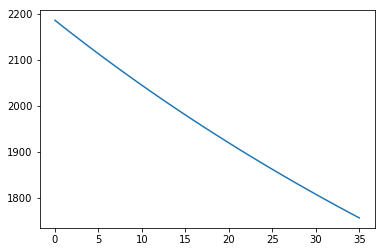

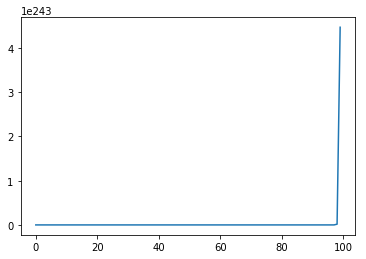

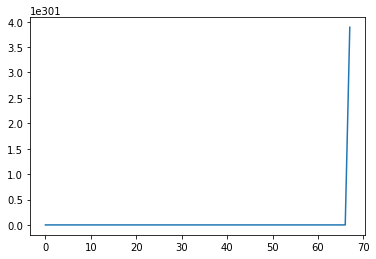

In [103]:
for step in [0.001, 1, 10]:
    w, errors = grad_descent(X_train[0:1000], y[0:1000], step, 100, 0.1, False)
    fg = plt.figure()
    plt.plot(errors)
    fg.show()

### расходится для шагов 1 и 100

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [104]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    errors = []
    w = np.array(X.shape[1] * [0])
    w_new = None
    if is_reg:
        func_grad = get_reg_grad
        func_err = get_reg_func
    else:
        func_grad = get_grad
        func_err = get_func
    for i in range(max_iter):
        ran = np.random.randint(0, high = len(y))
        X_s, y_s = np.array([X[ran,:]]), np.array([y[ran]])
        #print X_s, y_s
        errors += [func_err(w, X_s, y_s)]
        w_new = w - step_size*func_grad(w, X_s, y_s)
        if np.linalg.norm(w - w_new) < eps:
            break
        w = w_new
    return w, errors

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


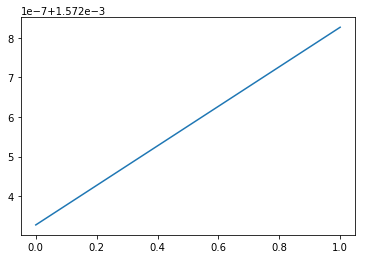

In [106]:
w, errors = sgd(X_train[0:1000,:], y[0:1000], step, 10, 0.1, False)
fg = plt.figure()
plt.plot(errors)
fg.show()

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


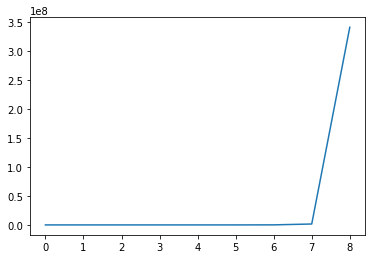

In [109]:
w, errors = sgd(X_train[0:1000,:], y[0:1000], step, 10, 0.01, True)
fg = plt.figure()
plt.plot(errors[0:-1])
fg.show()

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [ ]:
# Your code here